Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import cross_val_predict

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
117,40,F,NORMAL,HIGH,10.103,drugX
190,58,M,HIGH,HIGH,18.991,drugY
89,50,F,NORMAL,NORMAL,17.211,drugY
94,56,M,LOW,HIGH,15.015,drugY
1,47,M,LOW,HIGH,13.093,drugC
160,30,F,NORMAL,HIGH,10.443,drugX
188,65,M,HIGH,NORMAL,34.997,drugY
93,42,F,LOW,NORMAL,29.271,drugY
84,47,F,LOW,HIGH,10.067,drugC
154,37,M,LOW,NORMAL,16.724,drugY


In [4]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)

df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
3,28,0,2,0,7.798,drugX
112,35,1,1,1,9.170,drugX
172,39,0,2,1,17.225,drugY
60,38,0,1,1,29.875,drugY
31,74,1,0,0,9.567,drugB
118,32,0,0,1,10.292,drugA
169,20,0,0,0,11.262,drugA
43,23,1,2,0,12.260,drugX
26,31,1,0,0,30.366,drugY
177,25,1,2,0,19.011,drugY


In [5]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [6]:
y = df['Drug'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = tree_model.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [11]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.95


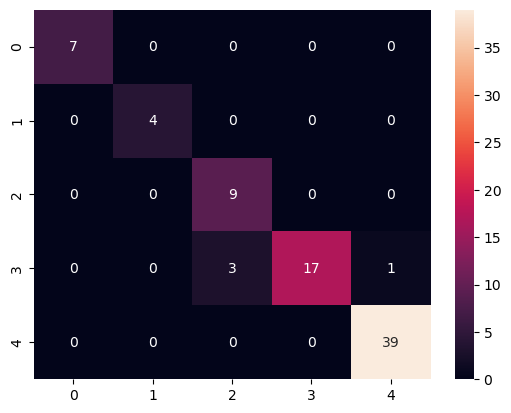

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [13]:
predict = cross_val_predict(tree_model, X=X, y=y, cv=5)
print("Classification Report:", classification_report(y, predict))

Classification Report:               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



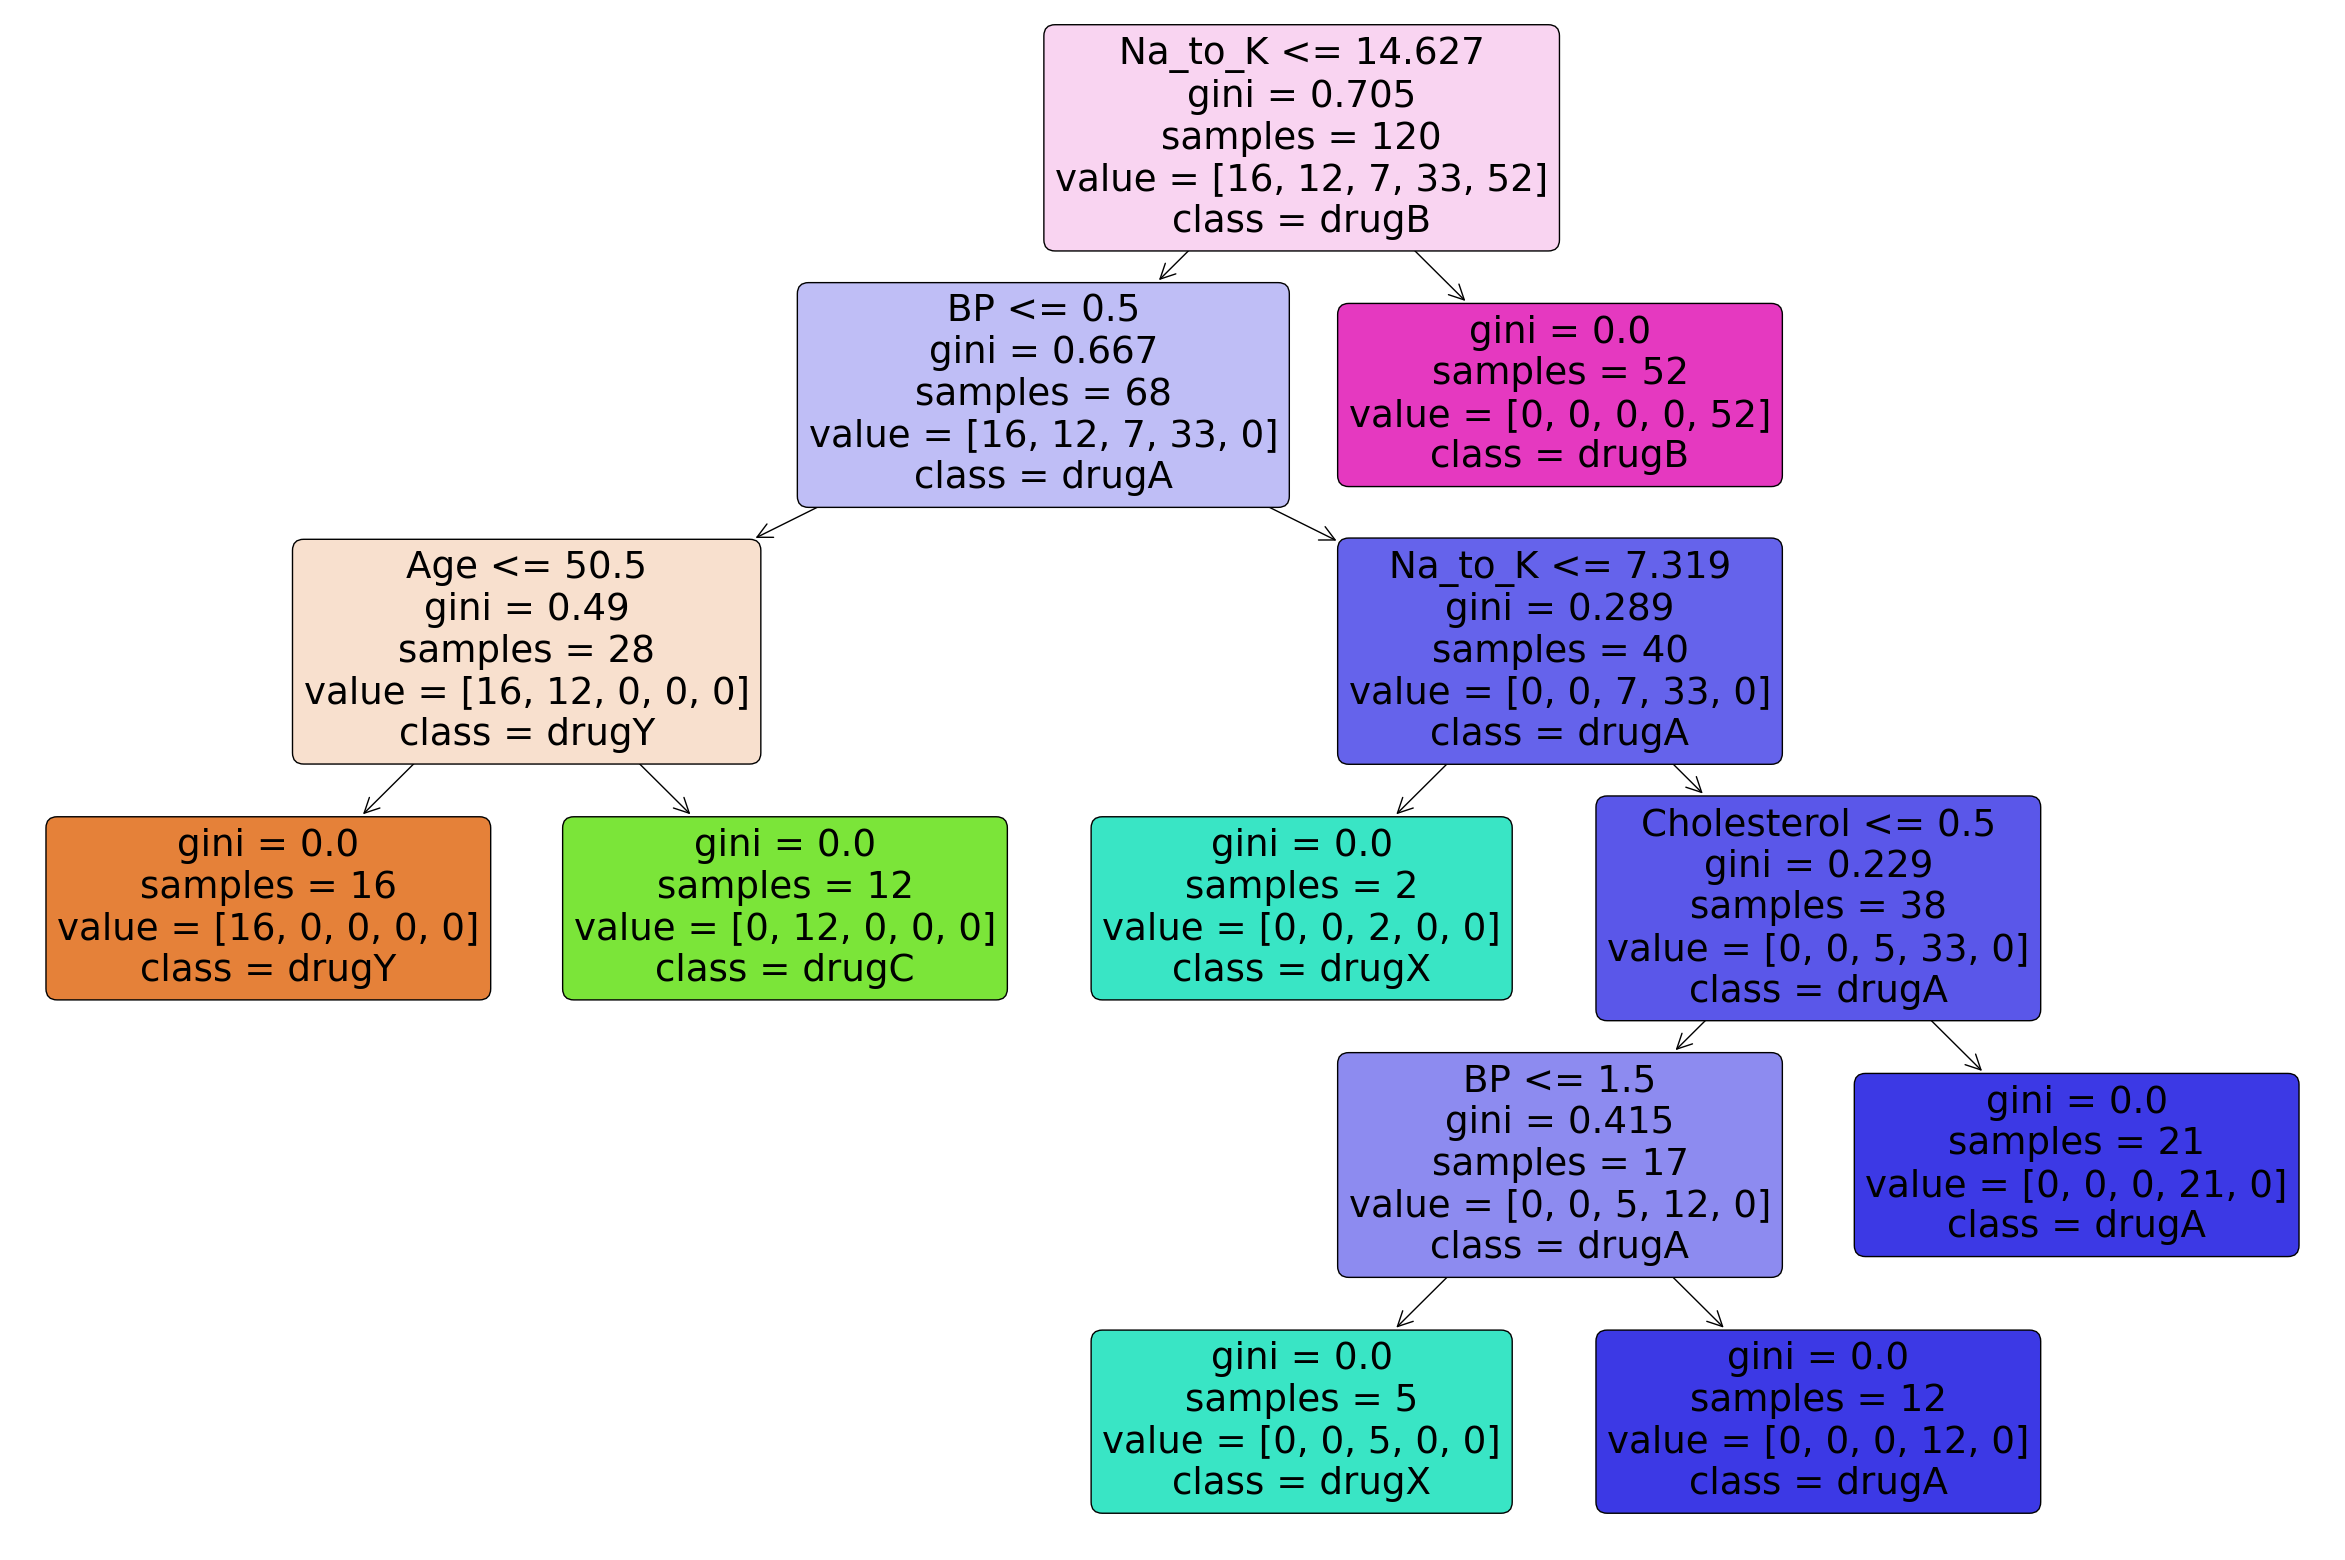

In [14]:
cols = df.drop("Drug", axis=1).columns
classes = df["Drug"].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True, rounded=True)
plt.show()

Hyperparameters

Decision tree accuracy: 0.95


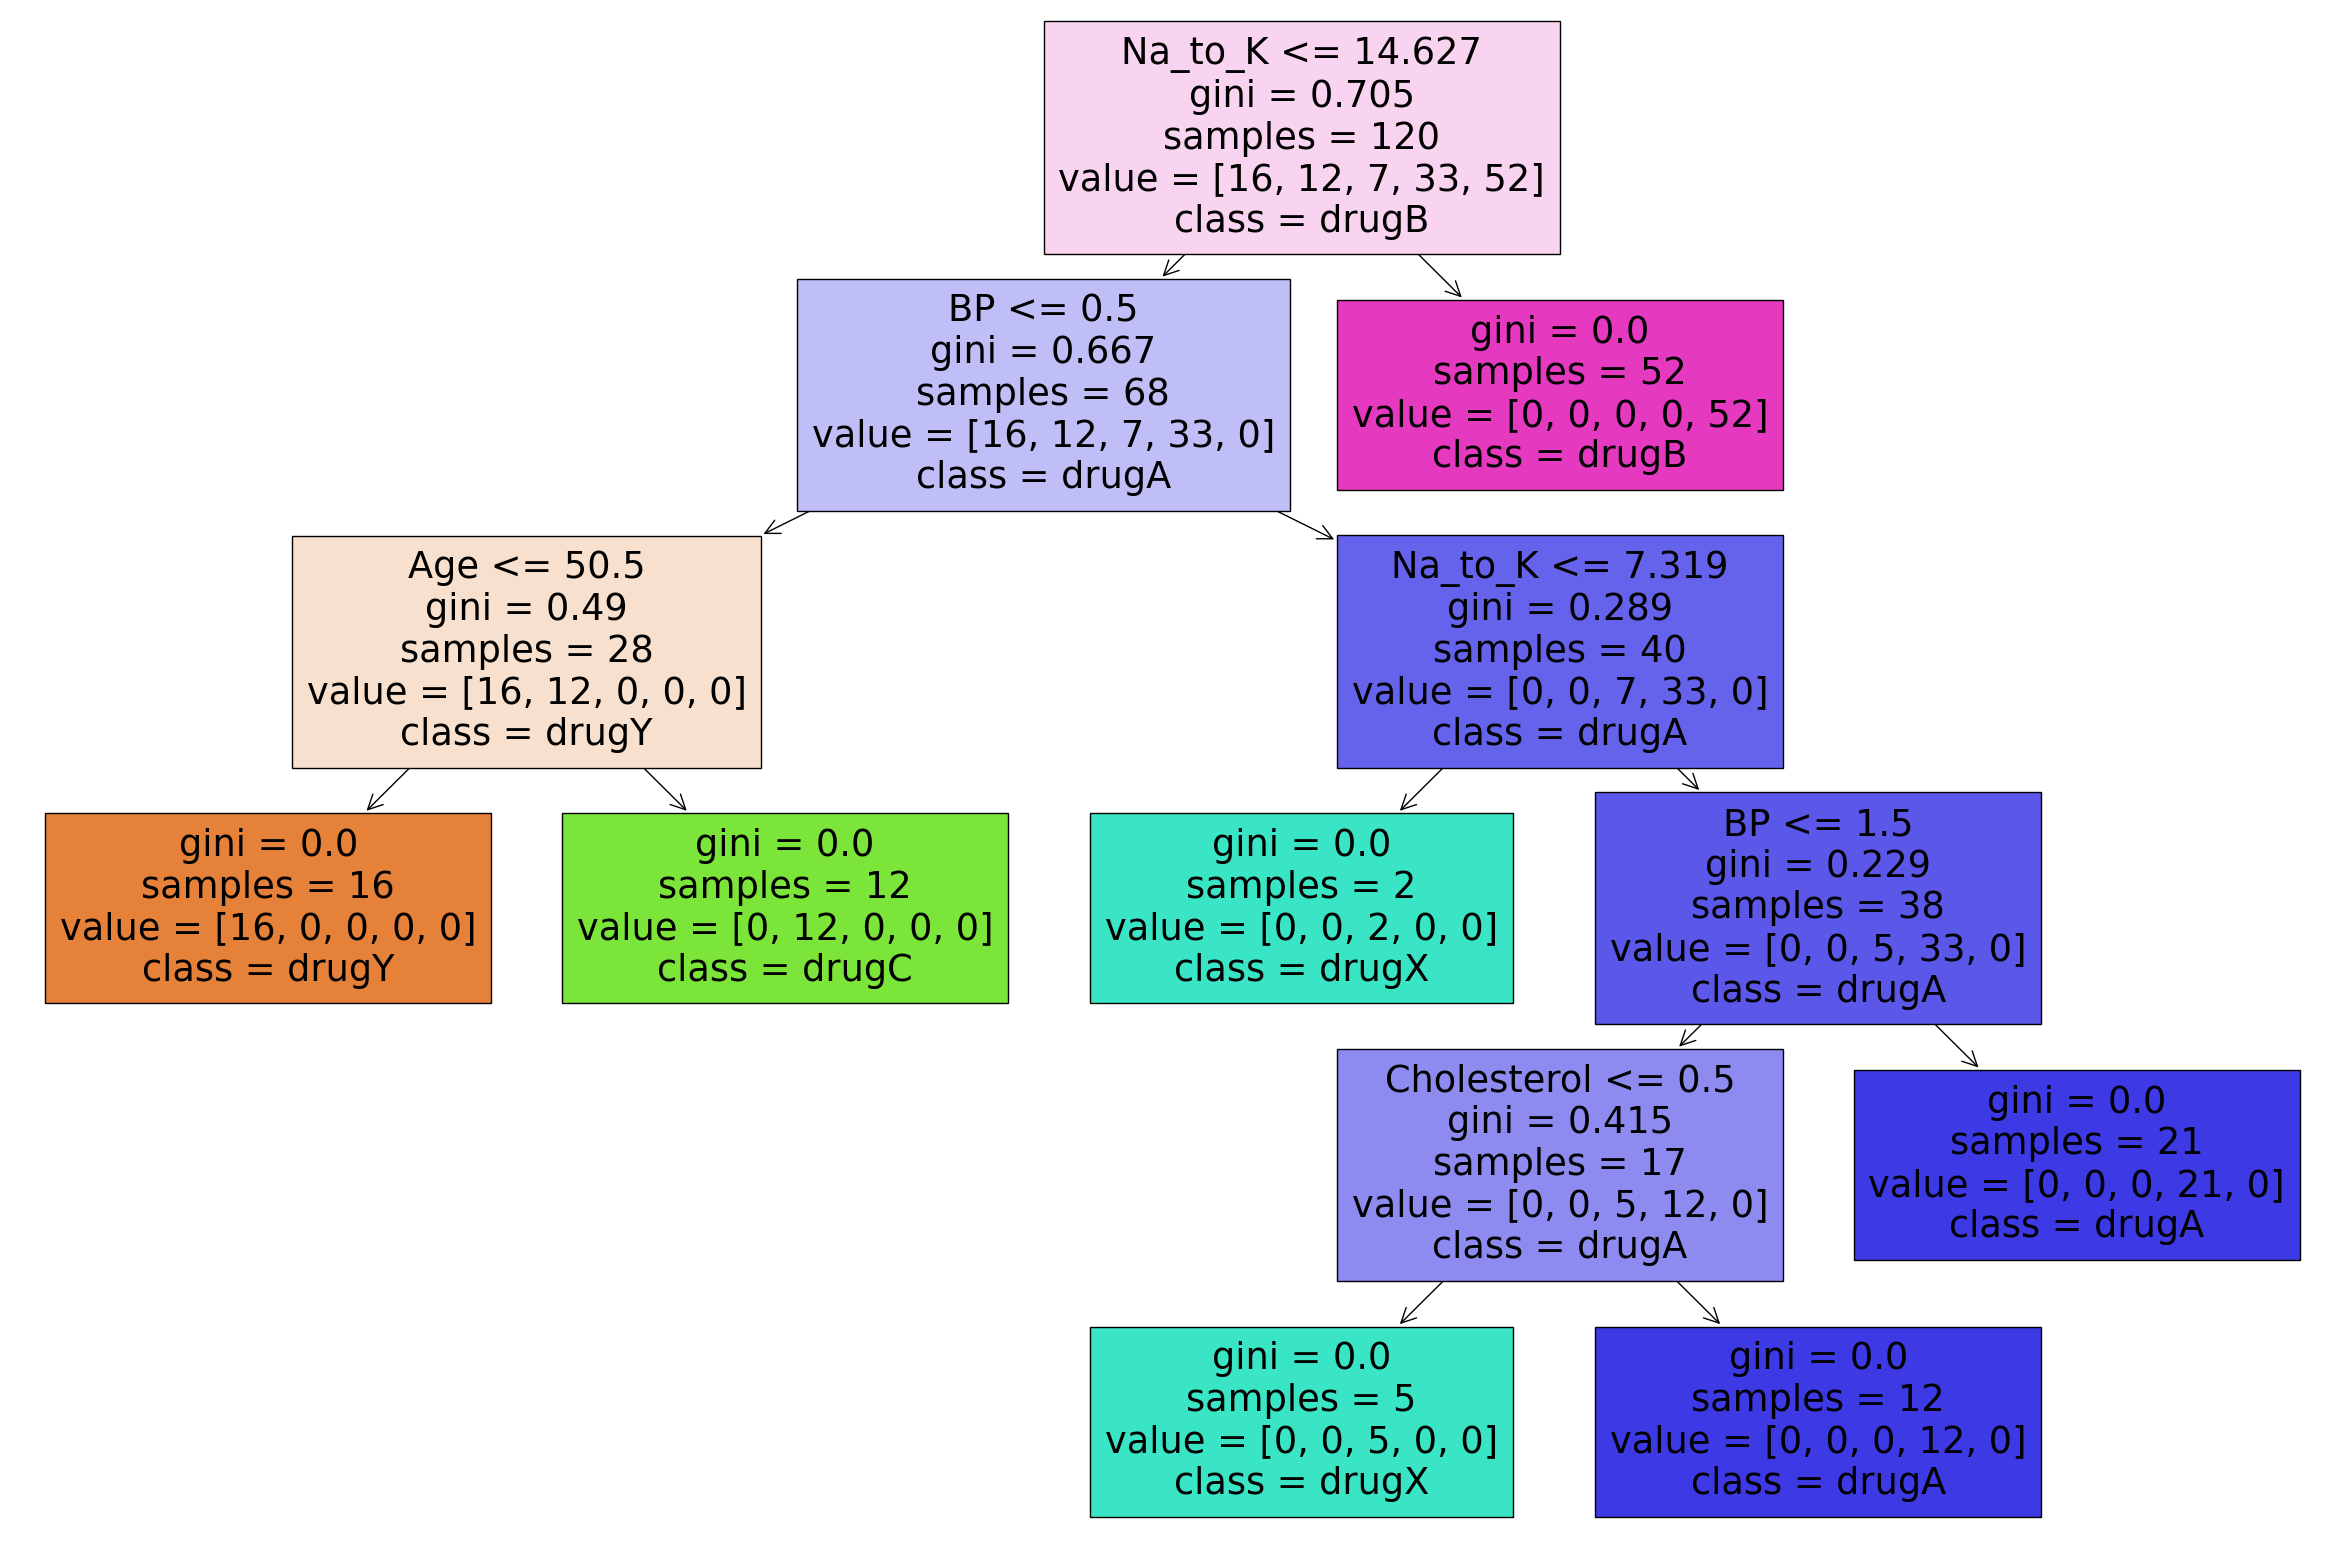

In [15]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("Decision tree accuracy:", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Decision tree accuracy: 0.875


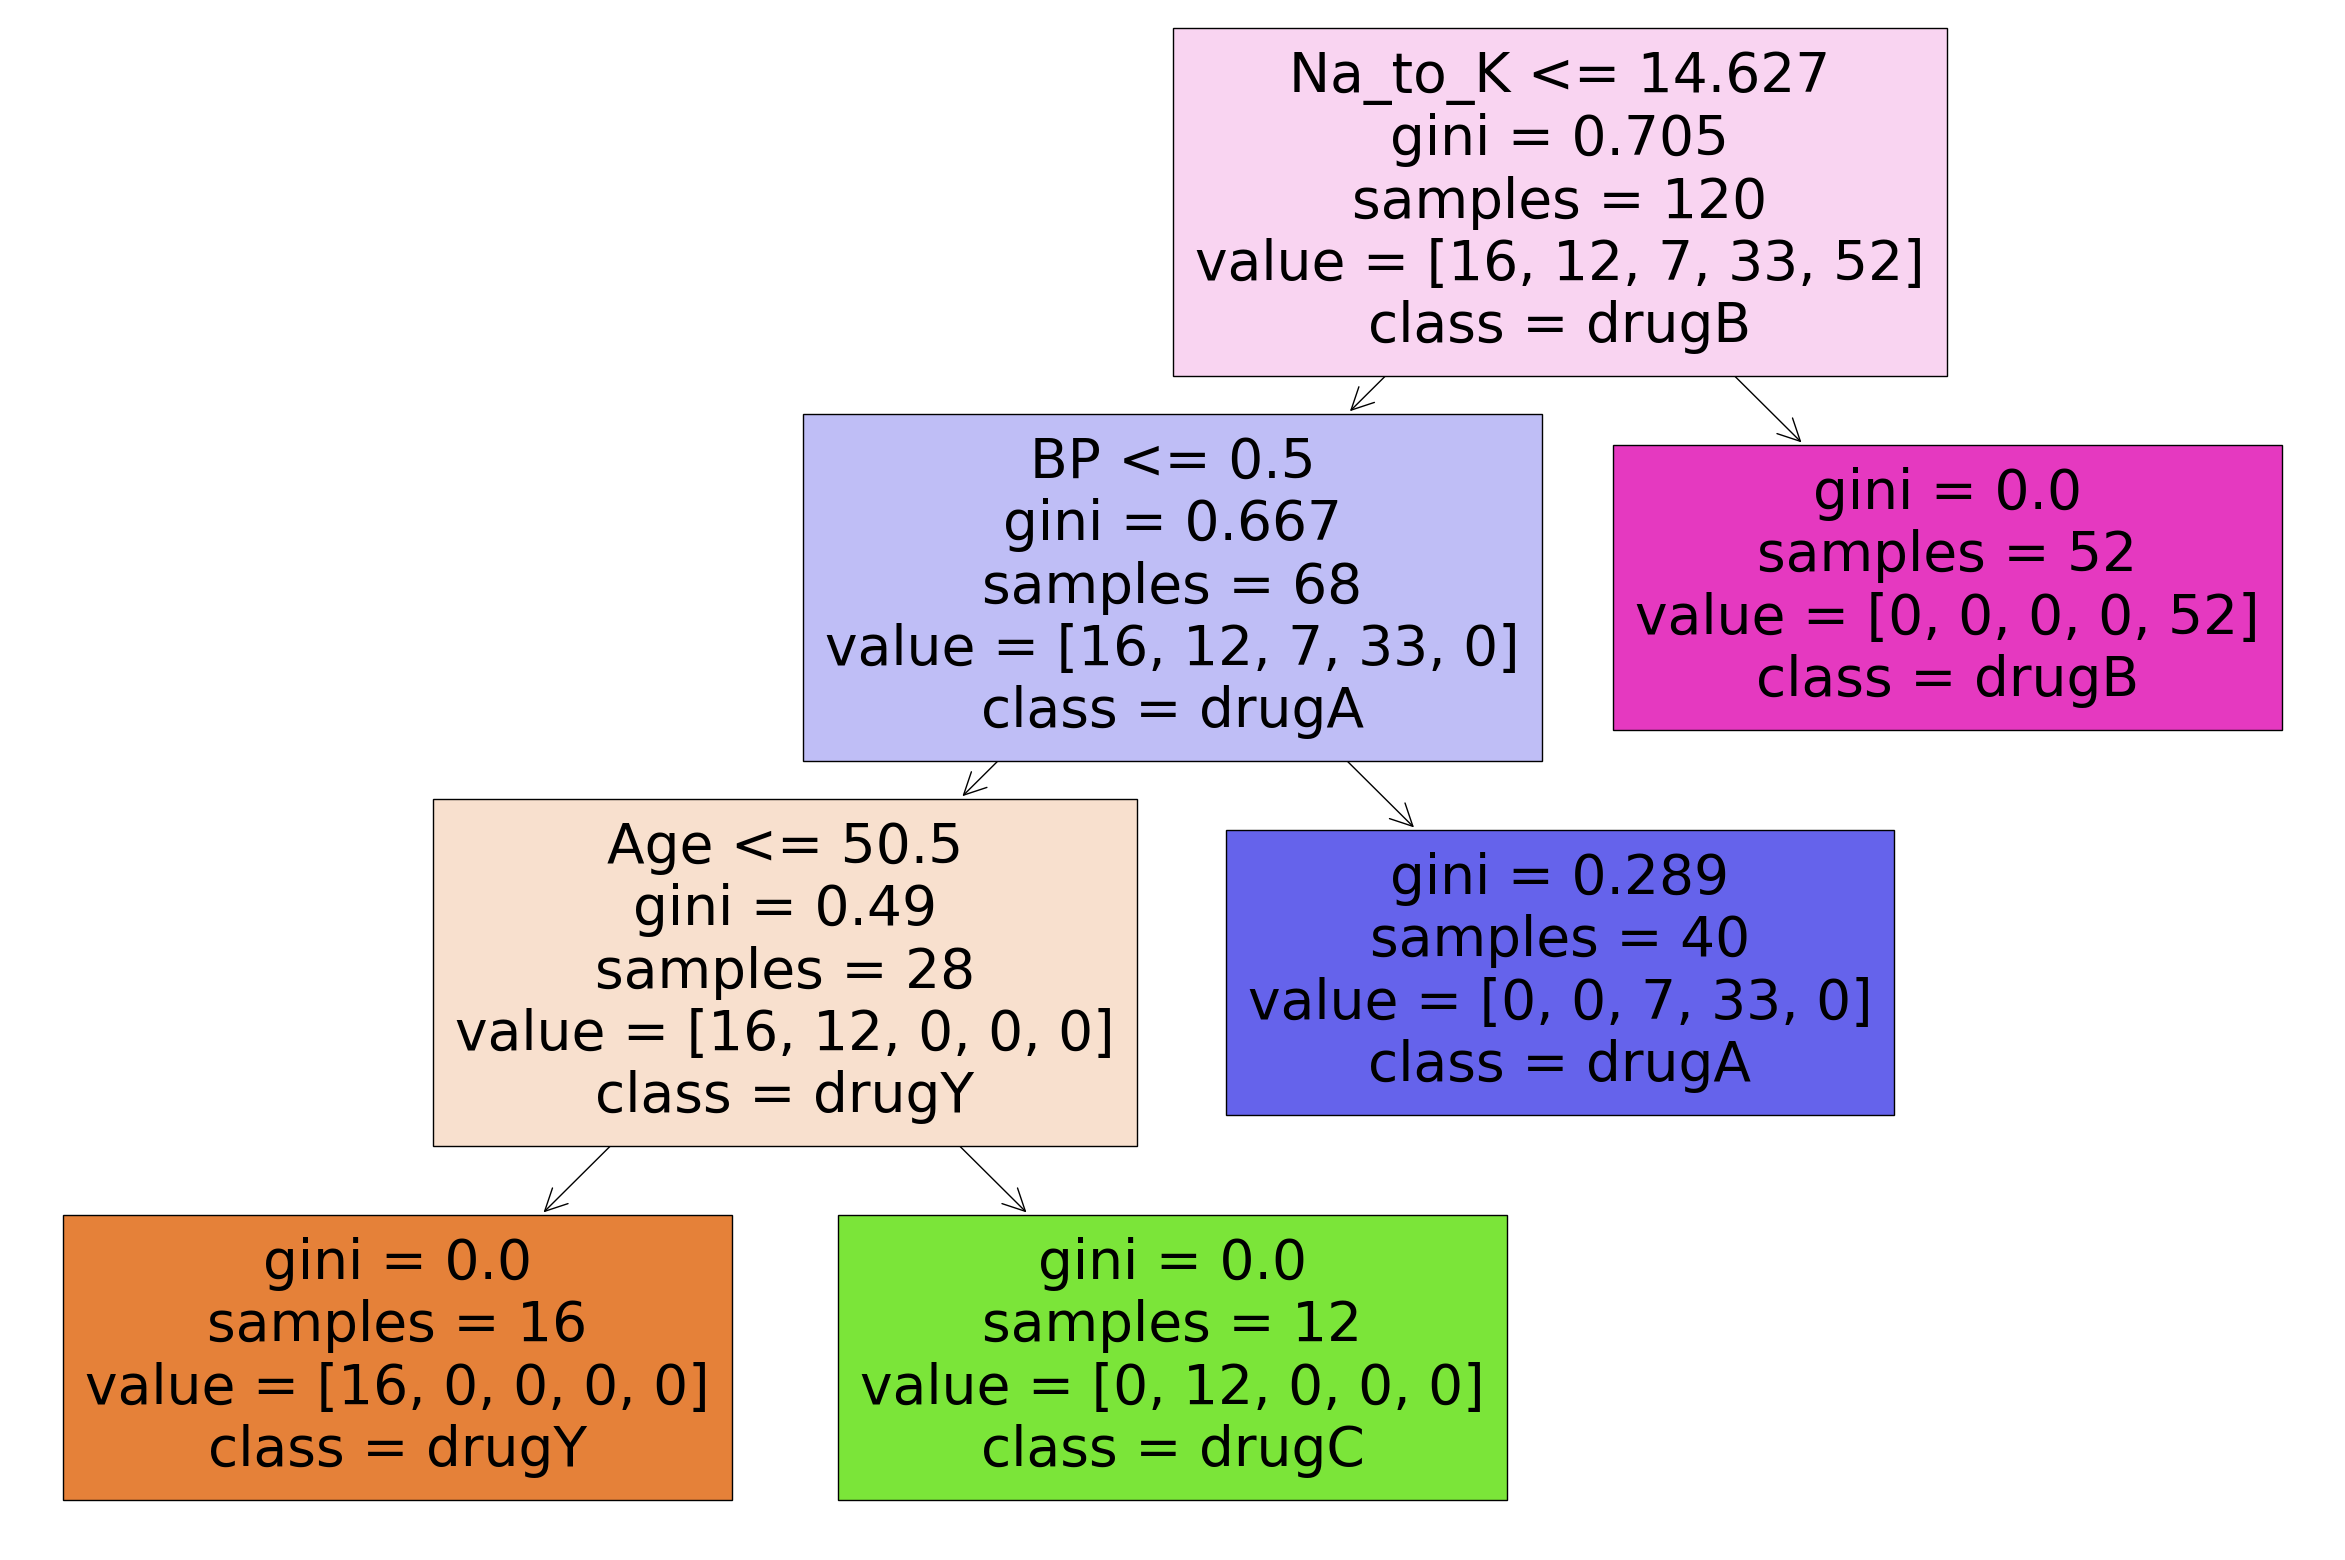

In [16]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.1, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("Decision tree accuracy:", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Decision tree accuracy: 0.9875


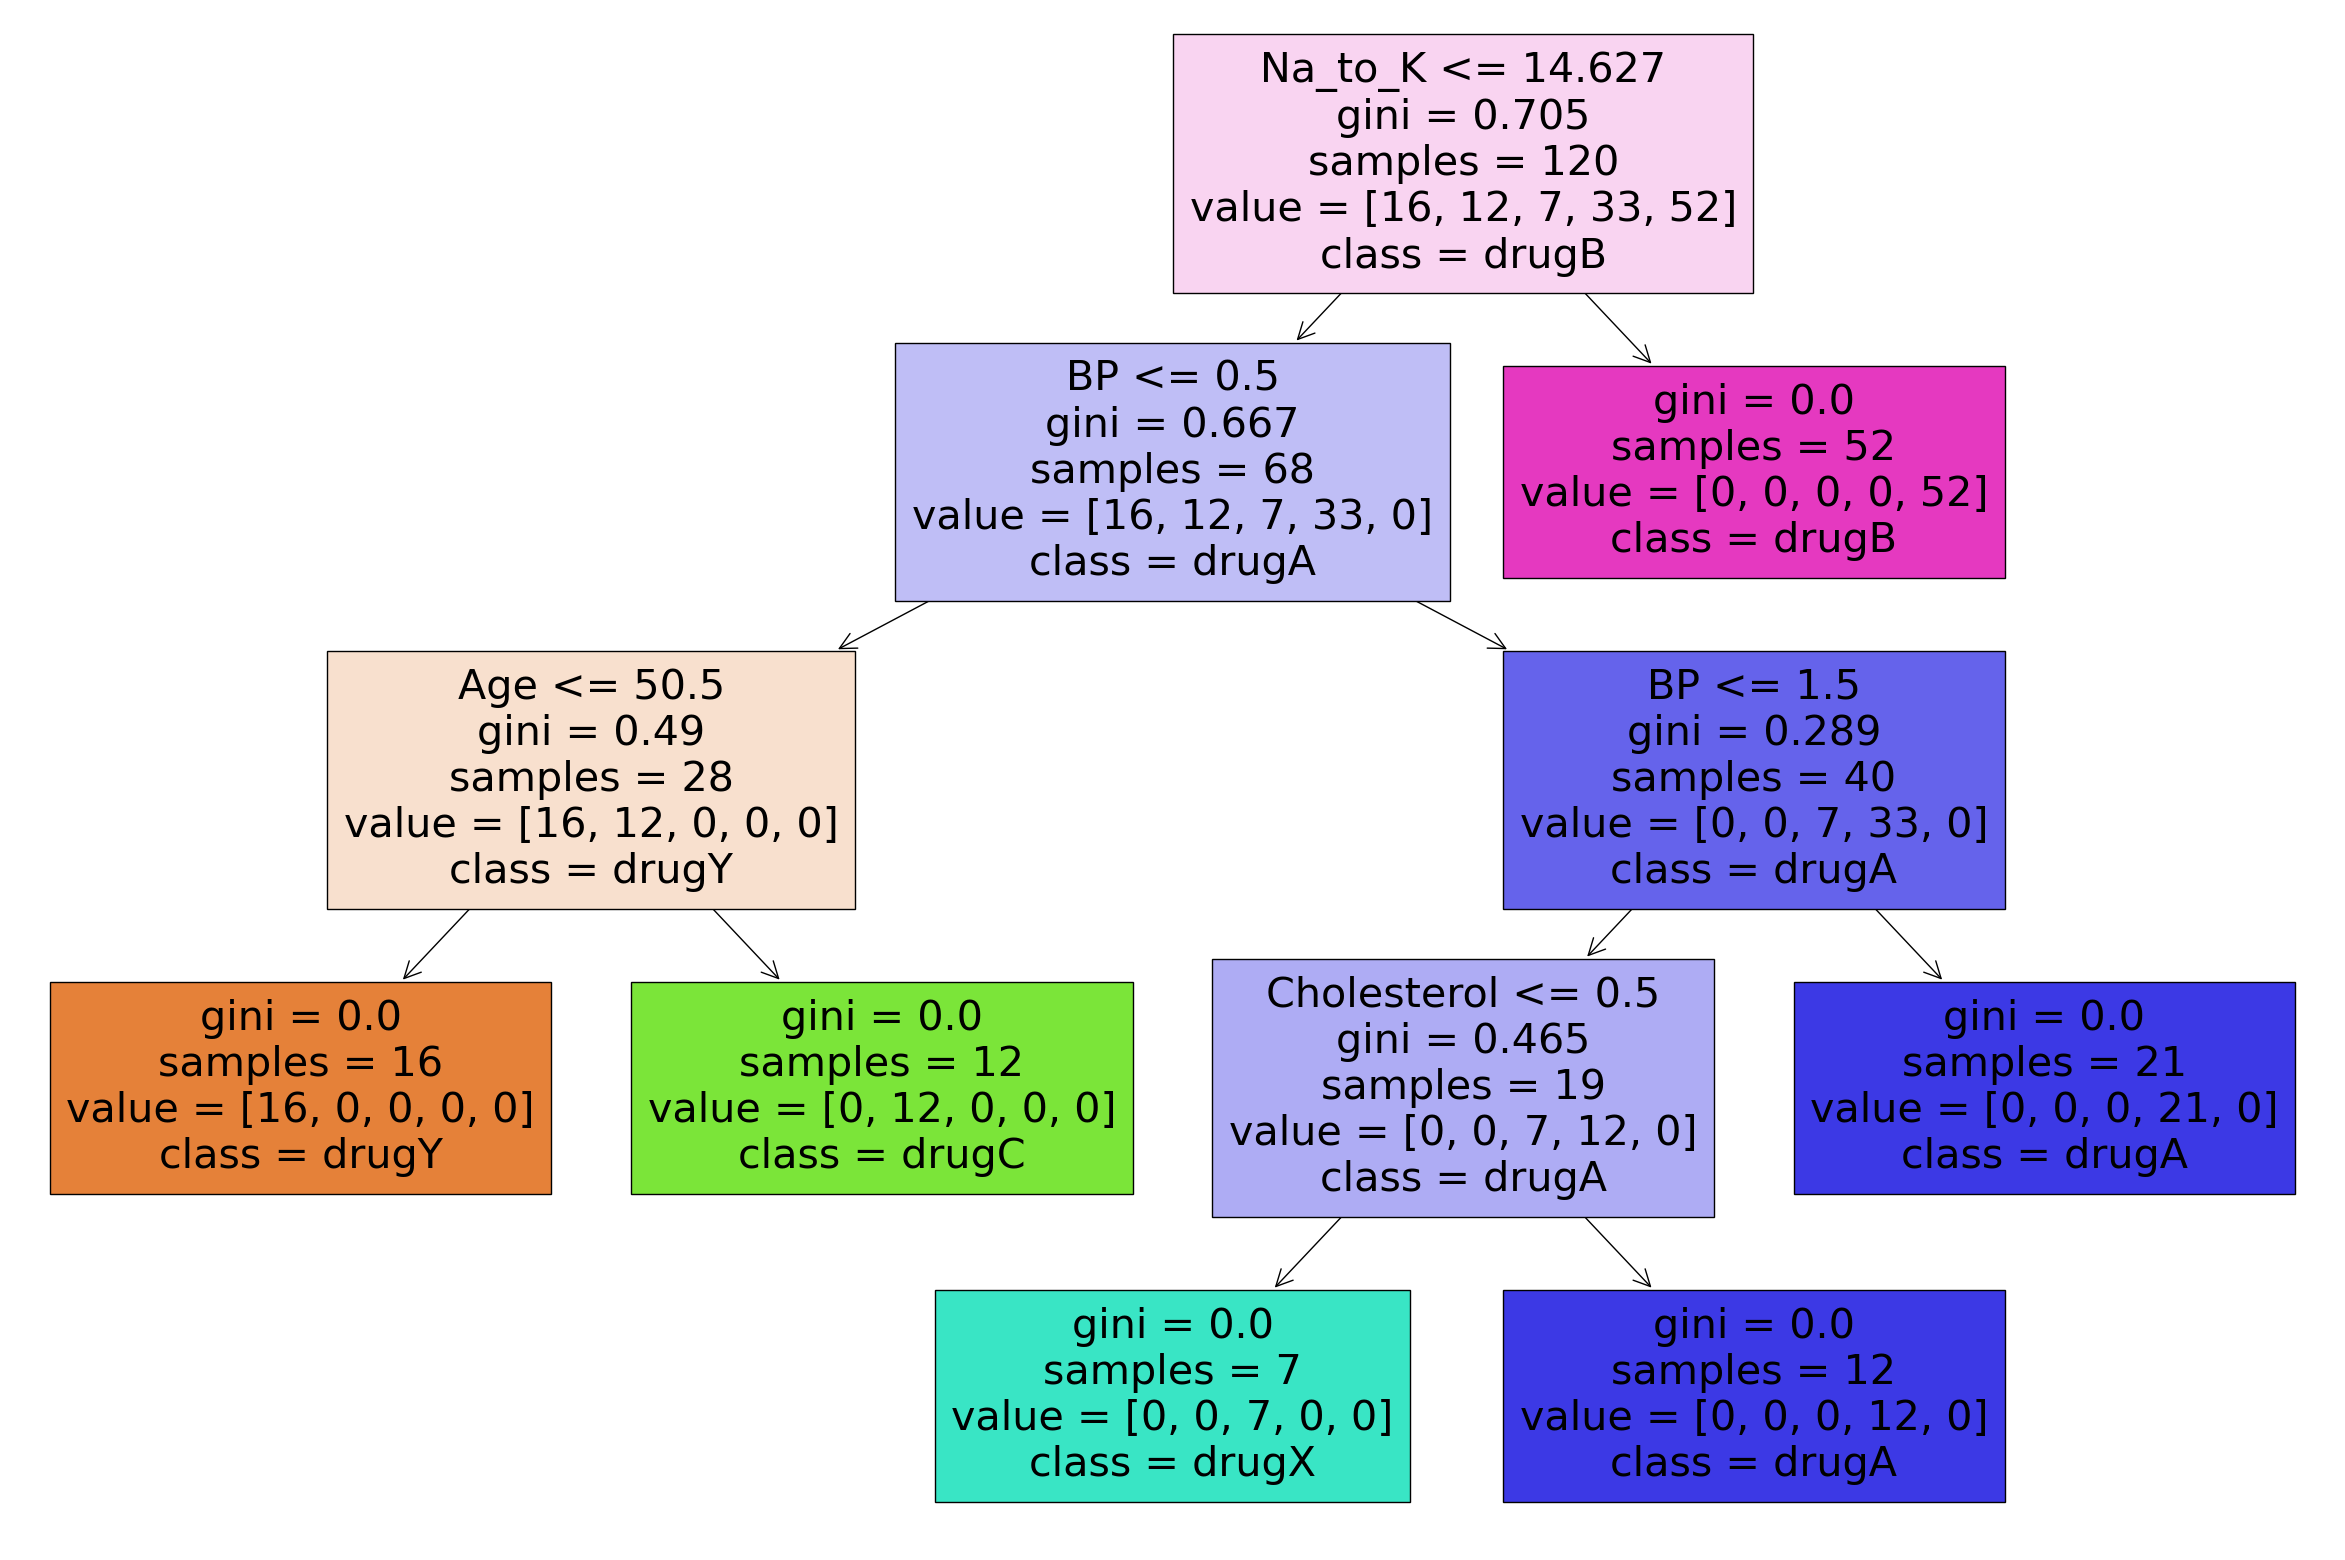

In [17]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("Decision tree accuracy:", accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Random Forest

In [18]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [19]:
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred))

Decision Tree accuracy: 0.9875
